In [ ]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 17.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=ef6fc5bef962e7b19d8c11f0378b8c0c8143698fc1d72d6a2150ee82b61e0212
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
!pip install mplfinance

     |████████████████████████████████| 61kB 5.7MB/s 


In [ ]:
url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
!wget $url/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget $url/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib
import talib

Selecting previously unselected package libta-lib0.
(Reading database ... 160975 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

     |████████████████████████████████| 276kB 12.4MB/s 
  Created wheel for ta-lib: filename=TA_Lib-0.4.19-cp37-cp37m-linux_x86_64.whl size=1437997 sha256=b56be2e2a8ca77fd9a9b48010a77c4a91035e2af749d9e1fca8be6666869d74c
  Stored in directory: /root/.cache/pip/wheels/a3/f6/12/3d1ccd06caadd8fa47e016991dd0d27f1163bb260f1854e2ff
Successfully built ta-lib


In [ ]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import mplfinance as mpf
import talib as tl
%matplotlib inline

In [ ]:
# import lq45 ticker
lq45_list = pd.read_excel('lq45_ticker.xlsx',sheet_name='Sheet1')

In [ ]:
# check the head
lq45_list.head()

,Ticker,yfinance Ticker,Company Name,Sector
0,ADHI,ADHI.JK,Adhi Karya (Persero) Tbk. [S],"Building Construction, 62"
1,ADRO,ADRO.JK,Adaro Energy Tbk [S],"Coal Mining, 21"
2,AKRA,AKRA.JK,AKR Corporindo Tbk. [S],"Wholesale (Durable and Non-Durable Goods), 91"
3,ANTM,ANTM.JK,Aneka Tambang Tbk. [S],"Metal and Mining, 23"
4,ASII,ASII.JK,Astra International Tbk. [S],"Automotive and Components, 42"


In [ ]:
# get lq45 ticker from yfinanace
symbols_string = ' '.join(list(lq45_list['yfinance Ticker']))
lq45_tickers = yf.Tickers(symbols_string)

In [ ]:
def pick_ticker(symbol):
    return lq45_tickers.tickers[list(lq45_list['yfinance Ticker']).index(symbol)]

In [ ]:
fund_col = ['Ticker','Company Name','Sector','Industry','latestPrice (IDR)','marketCap (Trillion IDR)','PBVR','Profit Margins (%)','Dividend Yield (%)']
fund_data = pd.DataFrame(columns=fund_col)

for ticker in list(lq45_list['yfinance Ticker']):
    info_ticker = pick_ticker(ticker).info
    if info_ticker['marketCap'] != None:
        marketCap = info_ticker['marketCap']/1000000000000
    else:
        marketCap = None
    
    if info_ticker['bookValue'] != None:
        if info_ticker['bookValue'] < 1:
            PBVR = info_ticker['previousClose']/(info_ticker['bookValue']*14000)
        else:
            PBVR = info_ticker['previousClose']/info_ticker['bookValue']
    else:
        PBVR = None
    
    if info_ticker['profitMargins'] != None:
        netProfit = info_ticker['profitMargins']*100
    else:
        netProfit = None
    
    if info_ticker['dividendYield'] != None:
        dividendYield = info_ticker['dividendYield']*100
    else:
        dividendYield = None
        
    fund_data = fund_data.append(pd.Series([
                ticker,
                info_ticker['shortName'],
                info_ticker['sector'],
               info_ticker['industry'],
               float(info_ticker['previousClose']),
               marketCap,
               PBVR,
               netProfit,
               dividendYield],index=fund_col),
                ignore_index=True)

fund_data

,Ticker,Company Name,Sector,Industry,latestPrice (IDR),marketCap (Trillion IDR),PBVR,Profit Margins (%),Dividend Yield (%)
0,ADHI.JK,Adhi Karya (Persero) Tbk.,Industrials,Engineering & Construction,1315.0,4.700322,0.841706,2.212000,1.4
1,ADRO.JK,Adaro Energy Tbk.,Energy,Thermal Coal,1270.0,41.581801,0.782020,5.796000,8.91
2,AKRA.JK,AKR Corporindo Tbk.,Energy,Oil & Gas Refining & Marketing,3370.0,13.342313,1.562581,3.998000,2.96
3,ANTM.JK,Aneka Tambang Tbk.,Basic Materials,Other Industrial Metals & Mining,2290.0,54.069301,2.890341,4.199000,0.12
4,ASII.JK,Astra International Tbk.,Consumer Cyclical,Auto Parts,5725.0,233.792787,1.488920,9.234000,3.3
5,ASRI.JK,Alam Sutera Realty Tbk.,Real Estate,Real Estate Services,246.0,4.676557,0.517596,-6.861000,None
6,BBCA.JK,Bank Central Asia Tbk.,Financial Services,Banks—Regional,33525.0,833.339016,4.477658,42.705002,1.65
7,BBNI.JK,Bank Negara Indonesia (Persero),Financial Services,Banks—Regional,6275.0,114.568966,1.060848,11.764000,None
8,BBRI.JK,Bank Rakyat Indonesia (Persero),Financial Services,Banks—Regional,4760.0,567.848632,2.956536,26.033002,None
9,BBTN.JK,Bank Tabungan Negara (Persero),Financial Services,Banks—Regional,1935.0,20.332801,1.025206,17.474002,0.1


In [ ]:
from matplotlib.gridspec import GridSpec

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


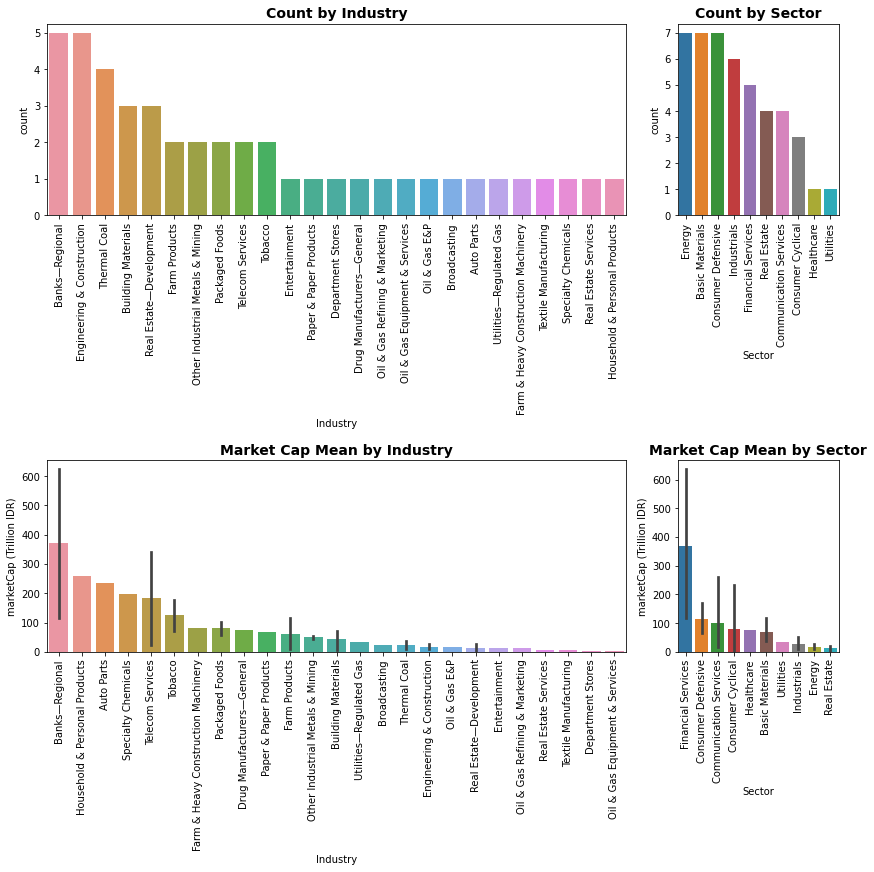

In [ ]:
# count and get marketcap mean by sector and industry
fig1 = plt.figure(constrained_layout=True,figsize=(12,12))
gs = GridSpec(2,3,figure=fig1)
ax1 = fig1.add_subplot(gs[0,:2])
ax2 = fig1.add_subplot(gs[0,2:])
ax3 = fig1.add_subplot(gs[1,:2])
ax4 = fig1.add_subplot(gs[1,2:])
sns.countplot(fund_data['Industry'],order=fund_data['Industry'].value_counts().index,ax=ax1)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax1.set_title('Count by Industry',fontweight='bold',fontsize=14)
sns.countplot(fund_data['Sector'],order=fund_data['Sector'].value_counts().index,ax=ax2)
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
ax2.set_title('Count by Sector',fontweight='bold',fontsize=14)
sns.barplot(x='Industry',y='marketCap (Trillion IDR)',data=fund_data,estimator=np.mean,ax=ax3,order=fund_data.groupby('Industry').mean()['marketCap (Trillion IDR)'].sort_values(ascending=False).index)
for tick in ax3.get_xticklabels():
    tick.set_rotation(90)
ax3.set_title('Market Cap Mean by Industry',fontweight='bold',fontsize=14)
sns.barplot(x='Sector',y='marketCap (Trillion IDR)',data=fund_data,estimator=np.mean,ax=ax4,order=fund_data.groupby('Sector').mean()['marketCap (Trillion IDR)'].sort_values(ascending=False).index)
for tick in ax4.get_xticklabels():
    tick.set_rotation(90)
ax4.set_title('Market Cap Mean by Sector',fontweight='bold',fontsize=14)
plt.show()

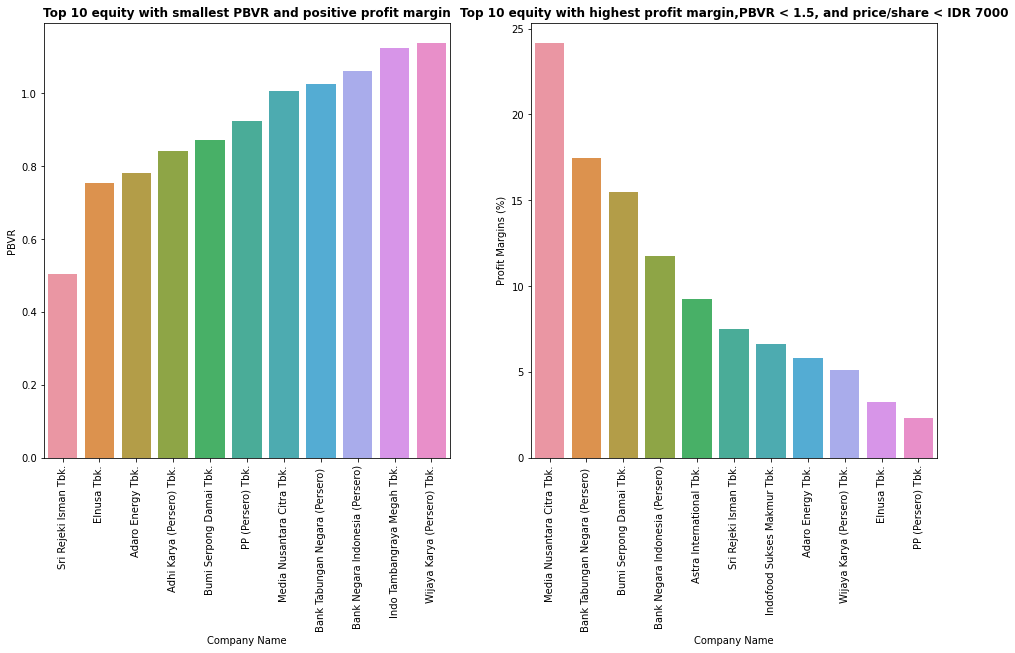

In [ ]:
# get top 10 pbvr and top 10 profit margin
top_10_pbvr = []
top_10_profit = []
fig2, ax = plt.subplots(1,2,figsize=(16,8))
sns.barplot(x='Company Name',y='PBVR',data=fund_data[fund_data['Profit Margins (%)']>0].sort_values(by='PBVR',ascending=True)[:11],ax=fig2.axes[0])
for tick in fig2.axes[0].get_xticklabels():
    top_10_pbvr.append(tick.get_text())
    tick.set_rotation(90)
fig2.axes[0].set_title('Top 10 equity with smallest PBVR and positive profit margin',fontsize=12,fontweight='bold')
sns.barplot(x='Company Name',y='Profit Margins (%)',data=fund_data[(fund_data['PBVR']<1.5) & (fund_data['latestPrice (IDR)']<=7000)].sort_values(by='Profit Margins (%)',ascending=False)[:11],ax=fig2.axes[1])
for tick in fig2.axes[1].get_xticklabels():
    top_10_profit.append(tick.get_text())
    tick.set_rotation(90)
fig2.axes[1].set_title('Top 10 equity with highest profit margin,PBVR < 1.5, and price/share < IDR 7000',fontsize=12,fontweight='bold')
plt.show()

In [ ]:
# recommendation by two plot above
pd.DataFrame(list(set(top_10_pbvr) & set(top_10_profit)),columns=['Equity Recommendation'])

,Equity Recommendation
0,Wijaya Karya (Persero) Tbk.
1,Elnusa Tbk.
2,Bank Tabungan Negara (Persero)
3,Bank Negara Indonesia (Persero)
4,Adaro Energy Tbk.
5,Sri Rejeki Isman Tbk.
6,Bumi Serpong Damai Tbk.
7,Media Nusantara Citra Tbk.
8,PP (Persero) Tbk.


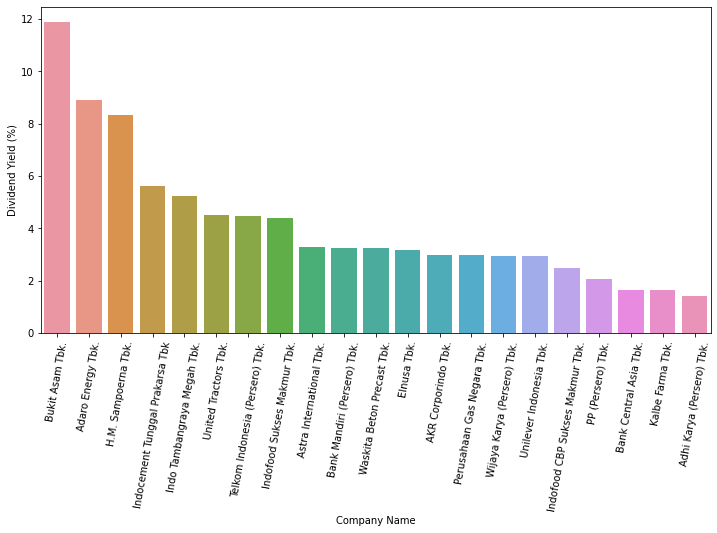

In [ ]:
# recommendation by devidend
plt.figure(figsize=(12,6))
sns.barplot(x='Company Name',y='Dividend Yield (%)',data=fund_data.sort_values(by='Dividend Yield (%)',ascending=False)[:21])
plt.xticks(rotation=80)
plt.show()

In [ ]:
# create function that generate technical analysis plot
def tech_plot(symbol='ADRO.JK',period=90):
    eq_ticker = yf.Ticker(symbol)
    eq_hist = eq_ticker.history(period='max',actions=False)

    open = eq_hist['Open']
    close = eq_hist['Close']
    high = eq_hist['High']
    low = eq_hist['Low']
    volume = eq_hist['Volume']

    macd, macdsignal, macdhist = tl.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
    roc = tl.ROC(close, timeperiod=10)
    rsi = tl.RSI(close, timeperiod=14)
    slowk, slowd = tl.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
    upperband, middleband, lowerband = tl.BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
    ema_12 = tl.EMA(close, timeperiod=12)
    ema_26 = tl.EMA(close, timeperiod=26)
    # fastk, fastd = tl.STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)
    # chaikin_ad_osci = tl.ADOSC(high, low, close, volume, fastperiod=3, slowperiod=10)
    # obv = tl.OBV(close, volume)
    # natr = tl.NATR(high, low, close, timeperiod=14)
    # cdl2crows = tl.CDL2CROWS(open, high, low, close)
    indicator_bundle = pd.concat([macd, macdsignal, macdhist,roc,rsi,slowk,slowd,upperband,middleband,lowerband,ema_12,ema_26],axis=1)
    indicator_bundle.rename(columns={0:'macd',1:'macdsignal',2:'macdhist',3:'roc',4:'rsi',5:'slowk',6:'slowd',7:'bband_upper',8:'bband_middle',9:'bband_lower',10:'ema_12',11:'ema_26'},inplace=True)
    eq_hist = pd.concat([eq_hist,indicator_bundle],axis=1)

    apds = [
            mpf.make_addplot(eq_hist['bband_upper'].tail(period),color='cyan',linestyle='--'),
            mpf.make_addplot(eq_hist['bband_lower'].tail(period),color='yellow',linestyle='--'),
            mpf.make_addplot(eq_hist['ema_12'].tail(period),color='lime'),
            mpf.make_addplot(eq_hist['ema_26'].tail(period),color='red'),
            mpf.make_addplot(eq_hist['macdhist'].tail(period),type='bar',width=0.7,panel=2,
                             color='lightgray',alpha=1,secondary_y=False,ylabel='MACD'),
            mpf.make_addplot(eq_hist['macd'].tail(period),panel=2,color='fuchsia',secondary_y=True),
            mpf.make_addplot(eq_hist['macdsignal'].tail(period),panel=2,color='b',secondary_y=True),
            mpf.make_addplot(eq_hist['rsi'].tail(period),panel=3,color='y',ylabel='RSI'),
            mpf.make_addplot(eq_hist['slowk'].tail(period),panel=4,color='b',ylabel='Stochastic\nSlow'),
            mpf.make_addplot(eq_hist['slowd'].tail(period),panel=4,color='r'),
            mpf.make_addplot(eq_hist['roc'].tail(period),panel=5,color='white',ylabel='ROC'),
           ]

    mpf.plot(eq_hist.tail(period),type='candle',volume=True,addplot=apds,figscale=3,figratio=(1,1),volume_panel=1,panel_ratios=(5,2,2,2,2,2),style='nightclouds')

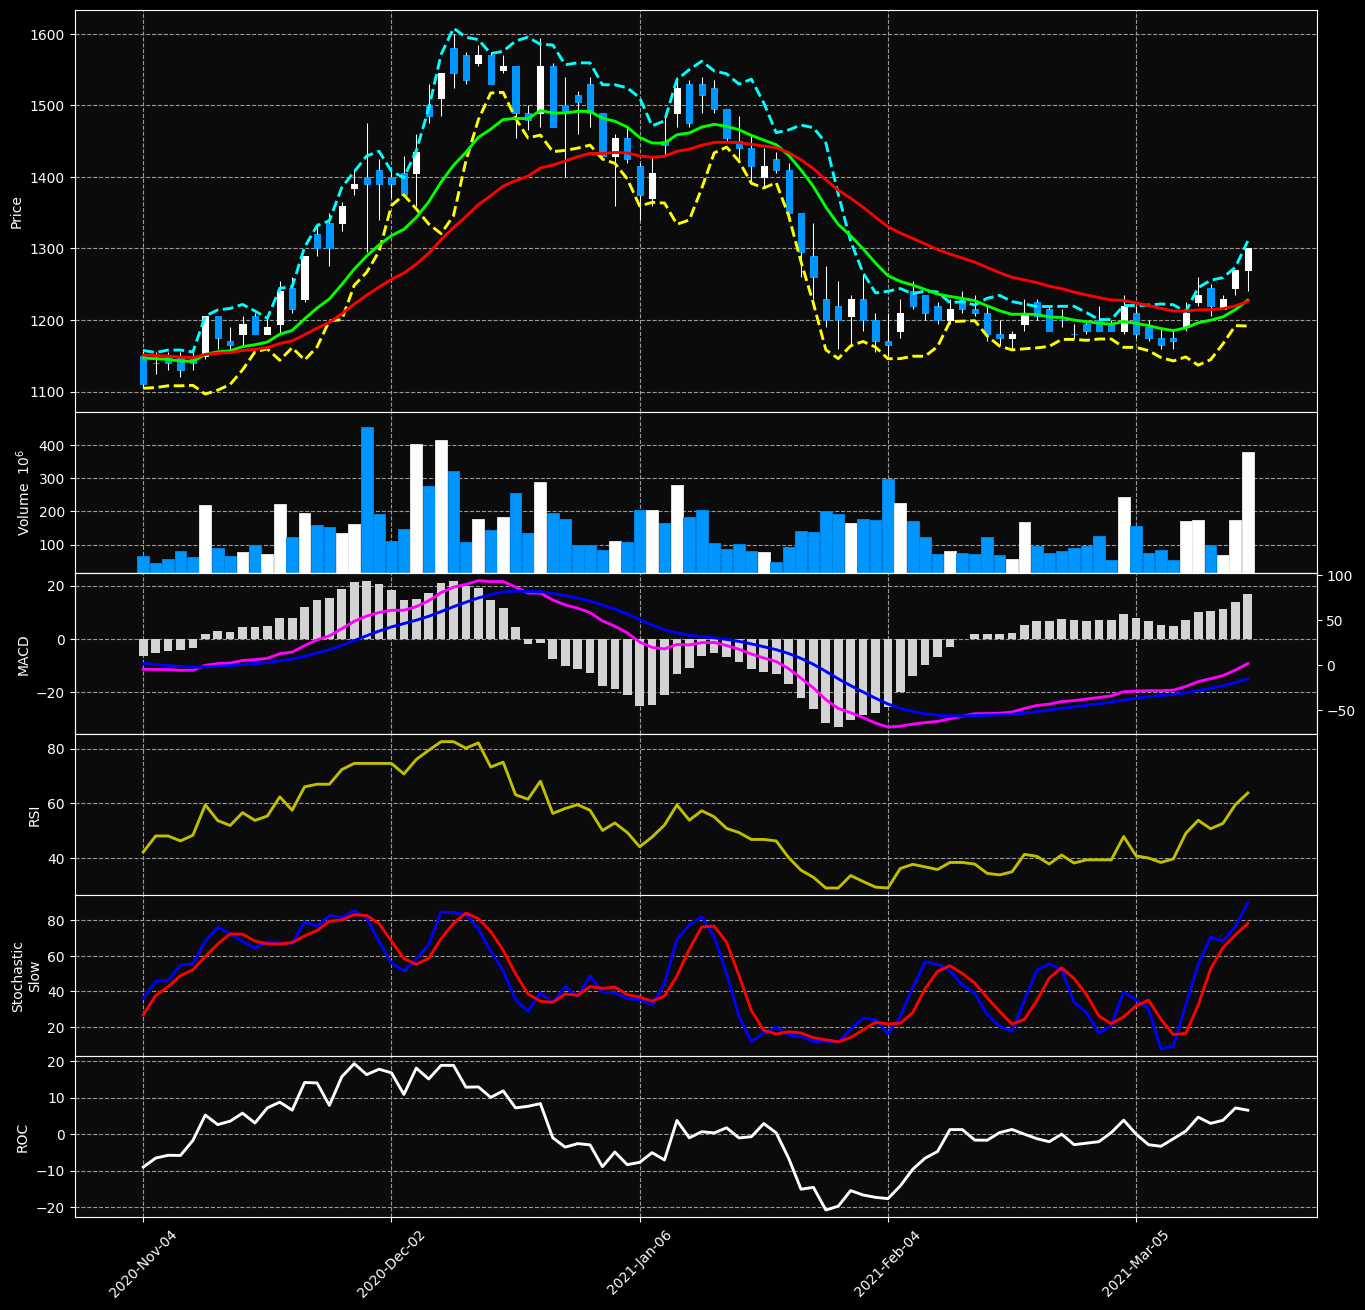

In [ ]:
tech_plot()

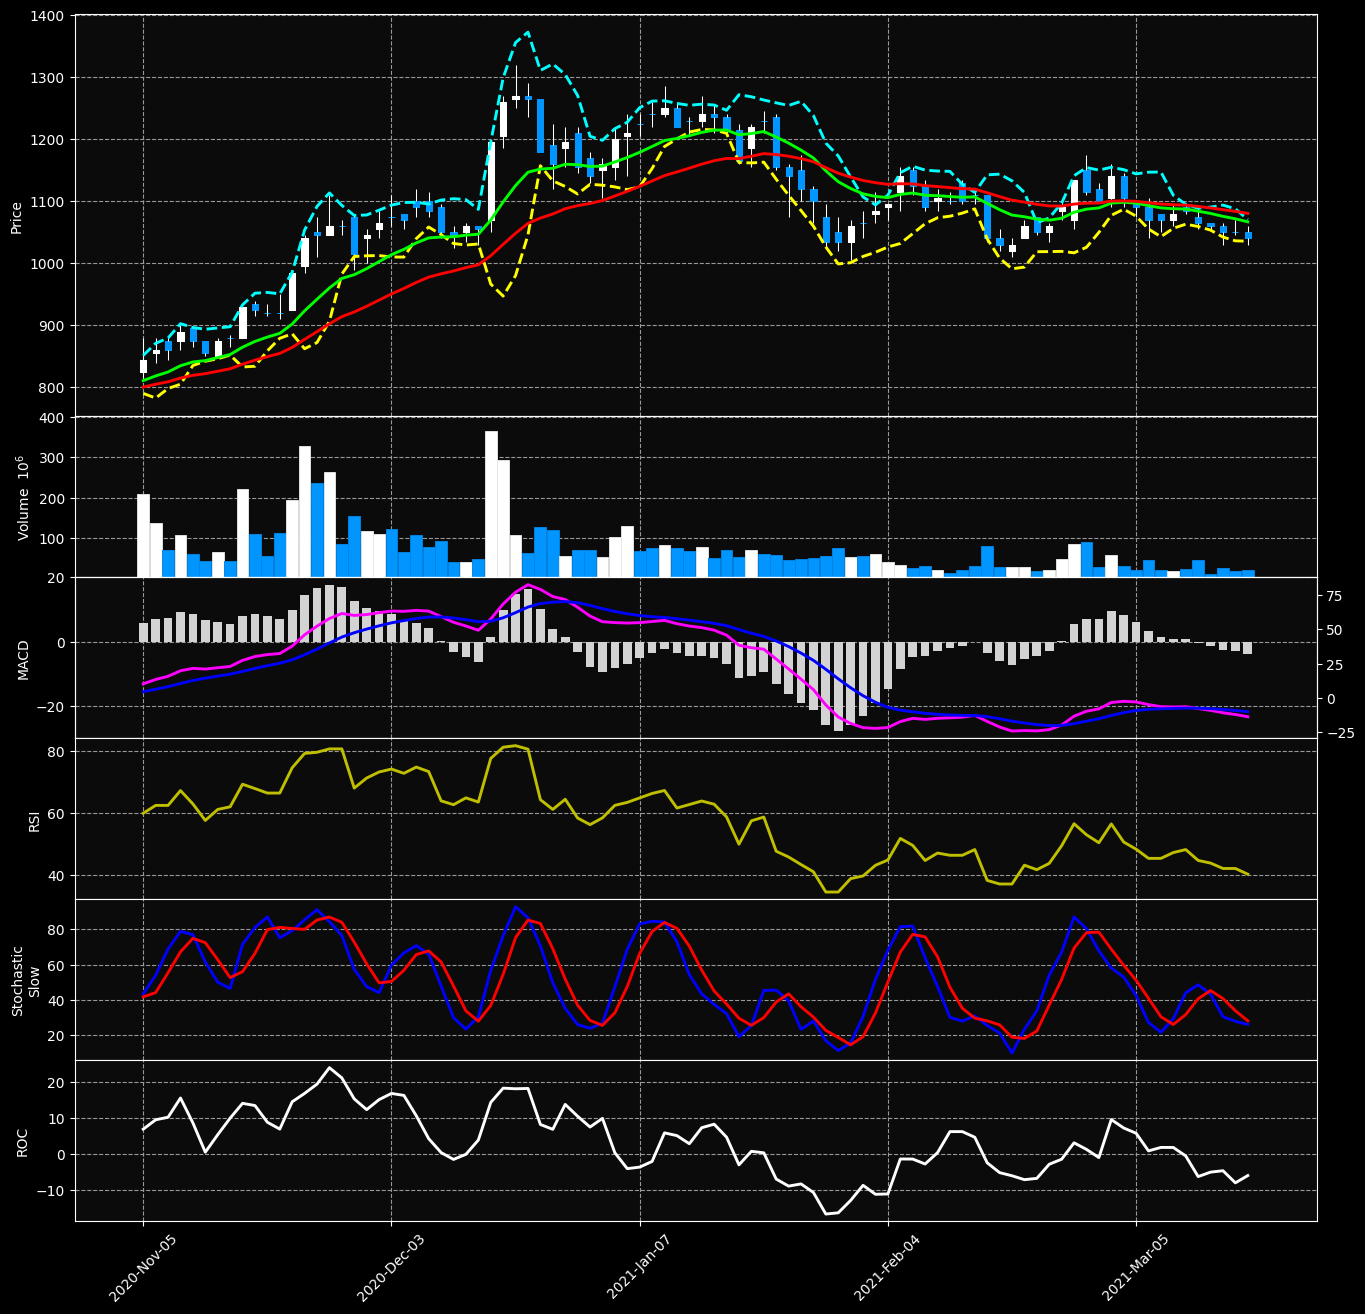

In [ ]:
tech_plot('MNCN.JK')

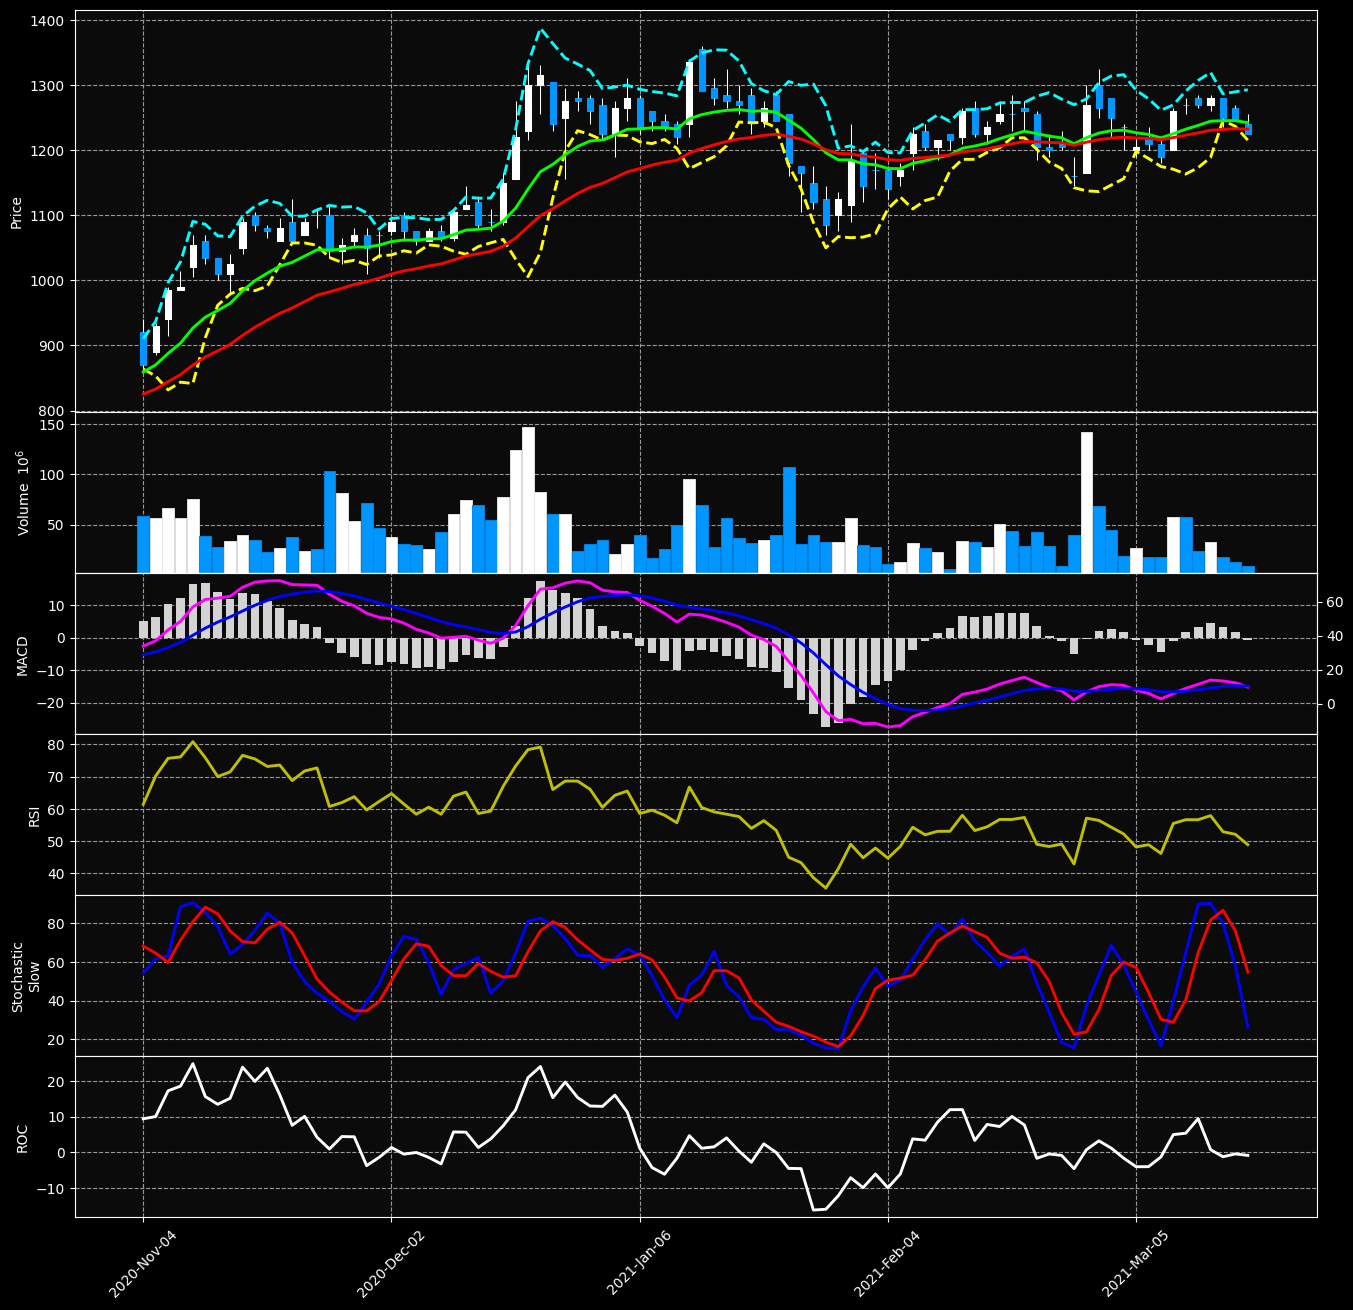

In [ ]:
tech_plot('BSDE.JK')

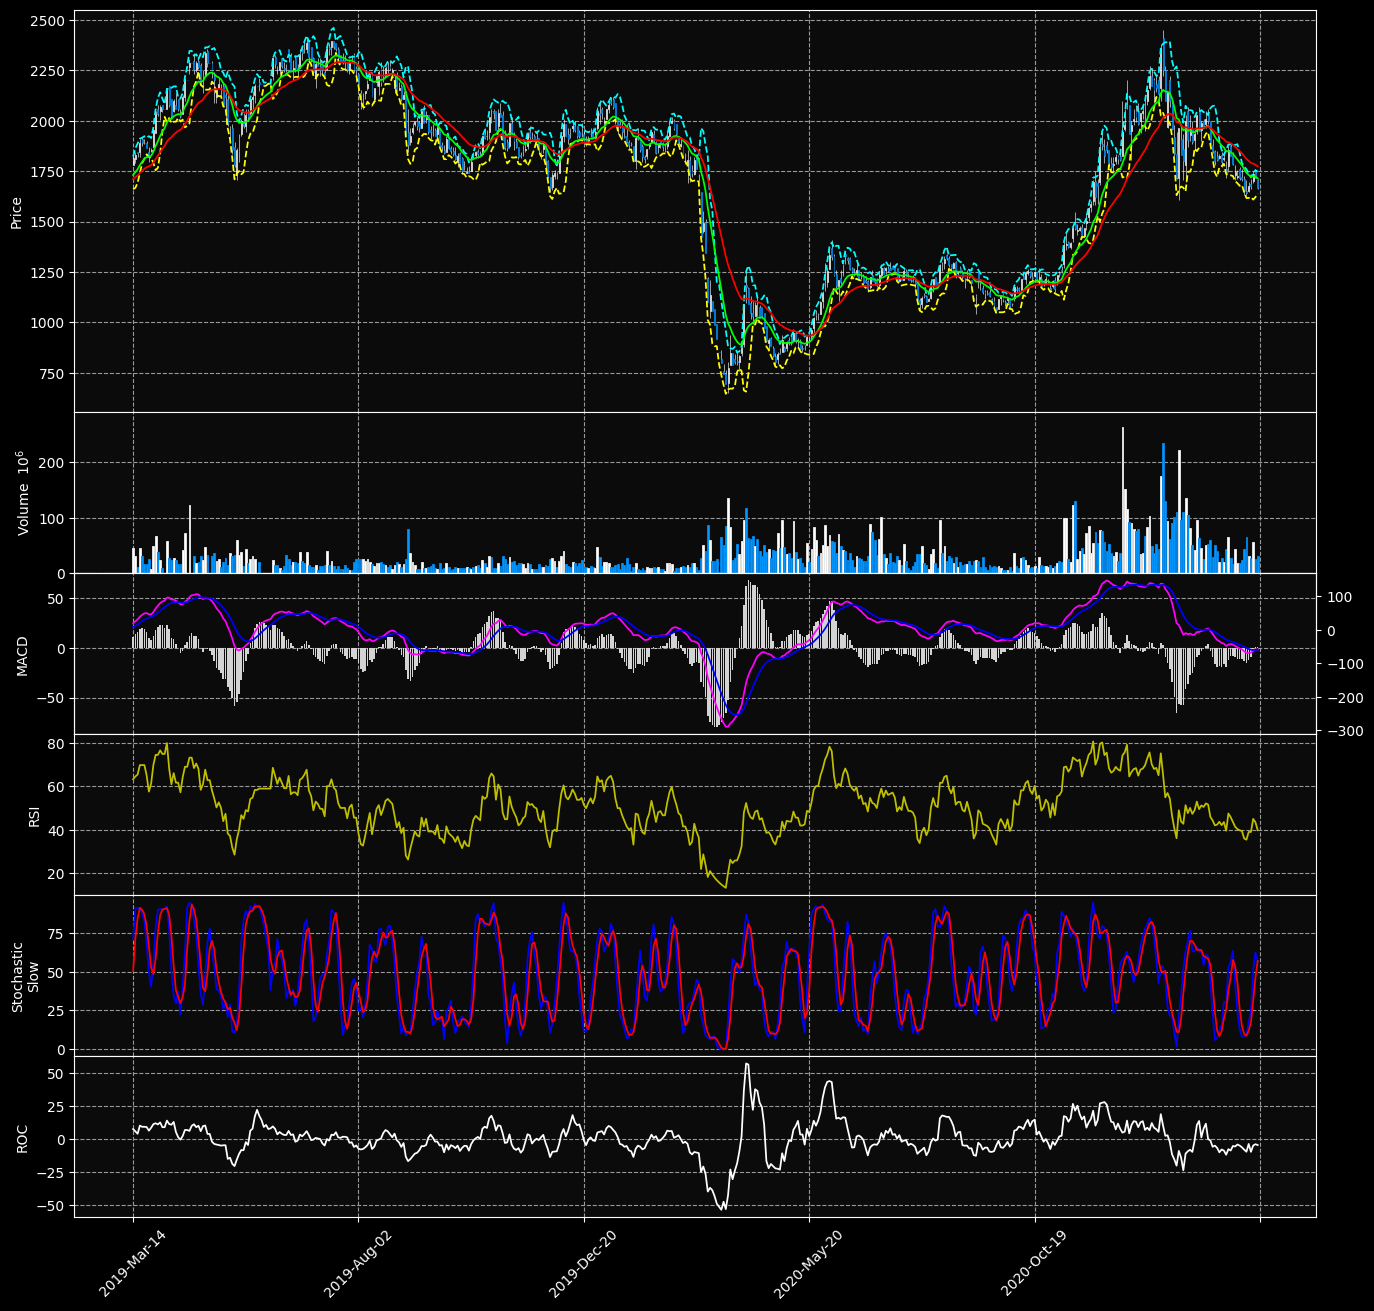

In [ ]:
tech_plot('WIKA.JK', 500)

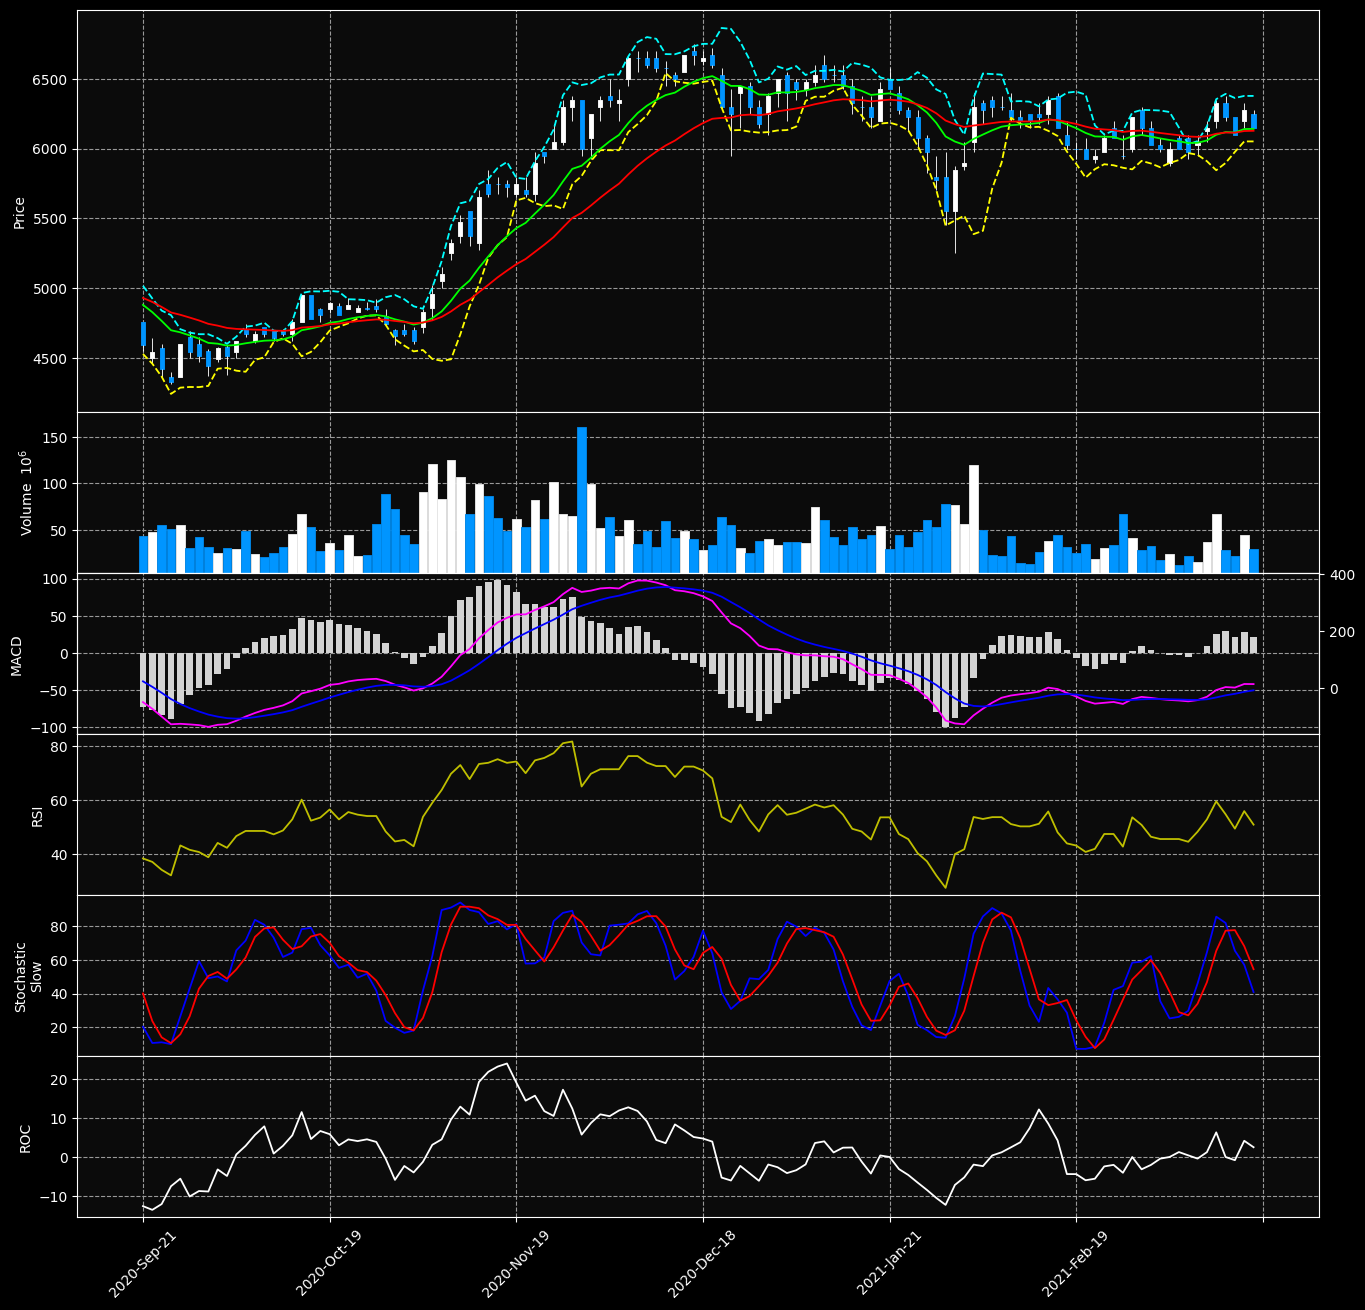

In [ ]:
tech_plot('BBNI.JK',120)

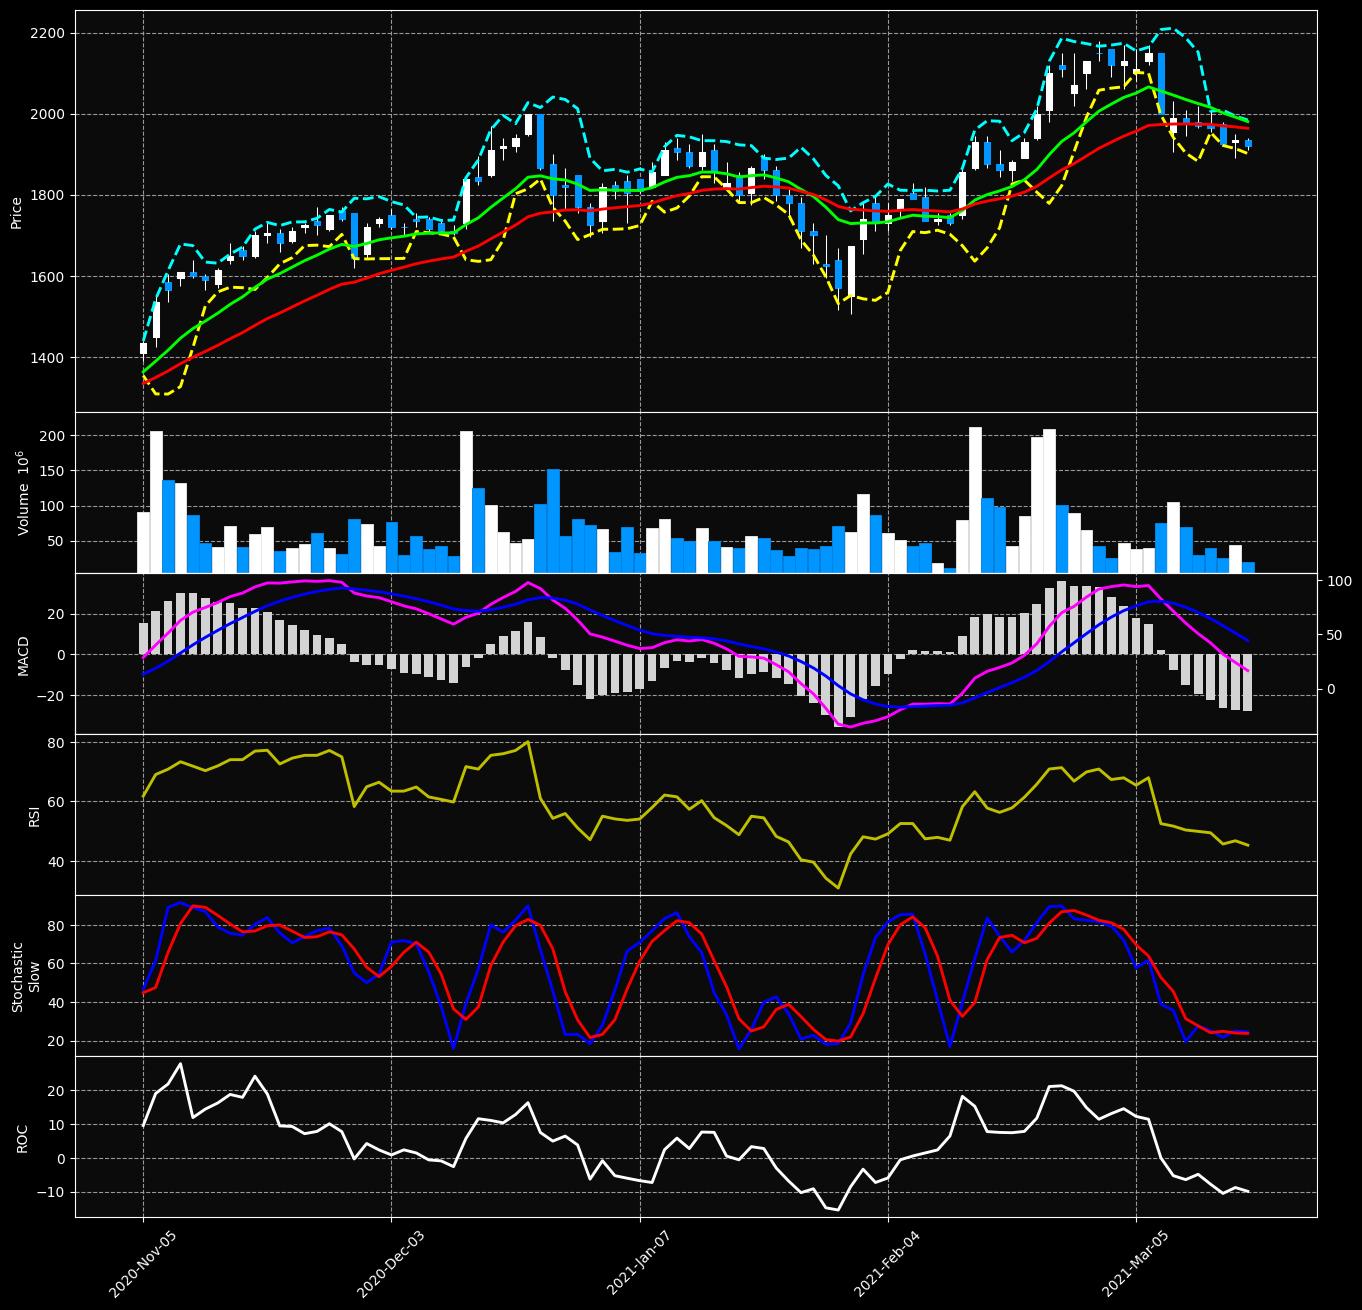

In [ ]:
tech_plot('BBTN.JK')